In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import missingno as ms
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
import matplotlib.patches as mpatches 
from matplotlib.colors import LinearSegmentedColormap

warnings.filterwarnings('ignore')
sns.set(style='whitegrid')
plt.style.use('Solarize_Light2')


# Data Preparation 

In [78]:
package_tourism = pd.read_csv("data/package_tourism.csv")

package_tourism.head(10)

,Package,City,Place_Tourism1,Place_Tourism2,Place_Tourism3,Place_Tourism4,Place_Tourism5
0,1,Jakarta,Pasar Tanah Abang,Taman Ayodya,Museum Tekstil,NaN,NaN
1,2,Jakarta,Pasar Tanah Abang,Pasar Taman Puring,Pasar Petak Sembilan,NaN,NaN
2,3,Jakarta,Perpustakaan Nasional,Monas,Masjid Istiqlal,NaN,NaN
3,4,Jakarta,Pulau Tidung,Pulau Bidadari,Pulau Pari,Pulau Pramuka,Pulau Pelangi
4,5,Jakarta,Museum Satria Mandala,Museum Wayang,Museum Bahari Jakarta,Museum Macan (Modern and Contemporary Art in N...,NaN
5,6,Jakarta,Waterboom PIK (Pantai Indah Kapuk),Jakarta Aquarium dan Safari,SnowBay Waterpark,NaN,NaN
6,7,Jakarta,Alive Museum Ancol,Ocean Ecopark,SnowBay Waterpark,NaN,NaN
7,8,Jakarta,Kota Tua,Museum Bank Indonesia,Monas,Perpustakaan Nasional,Masjid Istiqlal
8,9,Jakarta,Galeri Nasional Indonesia,Museum Seni Rupa dan Kramik,Galeri Indonesia Kaya,NaN,NaN
9,10,Jakarta,Taman Impian Jaya Ancol,Kota Tua,Museum Bank Indonesia,Museum Fatahillah,Museum Wayang


In [79]:
tourism_rating = pd.read_csv("data/tourism_rating.csv")

tourism_rating.head(10)

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
5,1,312,2
6,1,258,5
7,1,20,4
8,1,154,2
9,1,393,5


In [80]:
tourism_information = pd.read_csv("data/tourism_with_id.csv")

tourism_information.head(10)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5
5,6,Taman Impian Jaya Ancol,Taman Impian Jaya Ancol merupakan sebuah objek...,Taman Hiburan,Jakarta,25000,4.5,10.0,"{'lat': -6.117333200000001, 'lng': 106.8579951}",-6.117333,106.857995,NaN,6
6,7,Kebun Binatang Ragunan,Kebun Binatang Ragunan adalah sebuah kebun bin...,Cagar Alam,Jakarta,4000,4.5,NaN,"{'lat': -6.3124593, 'lng': 106.8201865}",-6.312459,106.820187,NaN,7
7,8,Ocean Ecopark,Ocean Ecopark Salah satu zona rekreasi Ancol y...,Taman Hiburan,Jakarta,180000,4.0,NaN,"{'lat': -6.125801699999999, 'lng': 106.8363249}",-6.125802,106.836325,NaN,8
8,9,Pelabuhan Marina,Pelabuhan Marina Ancol berada di kawasan Taman...,Bahari,Jakarta,175000,4.4,NaN,"{'lat': 1.07888, 'lng': 103.931398}",1.078880,103.931398,NaN,9
9,10,Pulau Tidung,Pulau Tidung adalah salah satu kelurahan di ke...,Bahari,Jakarta,150000,4.5,NaN,"{'lat': -5.803205300000001, 'lng': 106.5237907}",-5.803205,106.523791,NaN,10


In [81]:
tourism_user = pd.read_csv("data/user.csv")

tourism_user.head(10)

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20
5,6,"Jakarta Utara, DKI Jakarta",18
6,7,"Jakarta Selatan, DKI Jakarta",39
7,8,"Bandung, Jawa Barat",40
8,9,"Surabaya, Jawa Timur",38
9,10,"Bekasi, Jawa Barat",39


In [82]:
print(f"Number of places in the datasets : {len(tourism_information.Place_Id.unique())}")
print(f"Number of users : {len(tourism_user.User_Id.unique())}")
print(f"The number of ratings given by the user to the dataset : {len(tourism_rating.User_Id)}")

Number of places in the datasets : 437
Number of users : 300
The number of ratings given by the user to the dataset : 10000


Assesing Data

In [83]:
#Information Table Tourism 
tourism_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


- Place_Id (int64): ID unik untuk setiap destinasi wisata. Terdiri dari 437 nilai yang tidak null (non-null).
- Place_Name (object): Nama dari destinasi wisata. Terdiri dari 437 nilai yang tidak null.
- Description (object): Deskripsi dari destinasi wisata. Terdiri dari 437 nilai yang tidak null.
- Category (object): Kategori dari destinasi wisata (misalnya alam, budaya, dll.). Terdiri dari 437 nilai yang tidak null.
- City (object): Kota di mana destinasi wisata berada. Terdiri dari 437 nilai yang tidak null.
- Price (int64): Harga masuk ke destinasi wisata (jika ada). Terdiri dari 437 nilai yang tidak null.
- Rating (float64): Rating atau penilaian dari destinasi wisata. Terdiri dari 437 nilai yang tidak null.
- Time_Minutes (float64): Waktu yang dibutuhkan untuk mengunjungi destinasi tersebut dalam menit Terdiri dari 205 nilai yang tidak null, artinya ada banyak nilai yang hilang (missing).
- Coordinate (object): Koordinat dari destinasi wisata, biasanya dalam bentuk string. Terdiri dari 437 nilai yang tidak null.
- Lat (float64): Lintang (latitude) dari destinasi wisata. Terdiri dari 437 nilai yang tidak null.
- Long (float64): Bujur (longitude) dari destinasi wisata. Terdiri dari 437 nilai yang tidak null.
- Unnamed: 11 (float64): Kolom ini tidak memiliki nama dan semua nilainya adalah null (0 nilai yang tidak null).
- Unnamed: 12 (int64): Kolom ini tidak memiliki nama, tetapi memiliki 437 nilai yang tidak null. 
- Nilainya tidak diketahui dari output ini, tetapi mungkin memiliki informasi yang tidak diberi label dengan baik.

missing value

column Time_Minutes and Unnamed : 11

In [84]:
print("DataFrame Tourism Information : ")
print(tourism_information.isna().sum())

DataFrame Tourism Information : 
Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64


In [85]:
# Information Table tourism user
tourism_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


- Terdapat 300 entri dalam dataset ini.
- Kolom User_Id memiliki 300 nilai value.
- Kolom Location memiliki 300 nilai value.
- Kolom Age memiliki 300 nilai value.
- Data ini memiliki beberapa tipe data, termasuk objek (string) dan integer.

missing value

In [86]:
print("DataFrame Tourism User : ")
print(tourism_user.isna().sum())

DataFrame Tourism User : 
User_Id     0
Location    0
Age         0
dtype: int64


In [87]:
# information table tourism rating
tourism_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


- Terdapat 10000 entri dalam dataset ini.
- kolom User_Id memiliki 10000 nilai value.
- kolom Place_Id memiliki 10000 nilai value.
- kolom Place_Ratings 10000
- Data ini memmiliki tipe data hanya integer.

missing value

In [88]:
print("DataFrame Tourism User : ")
print(tourism_rating.isna().sum())

DataFrame Tourism User : 
User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64


<Axes: >

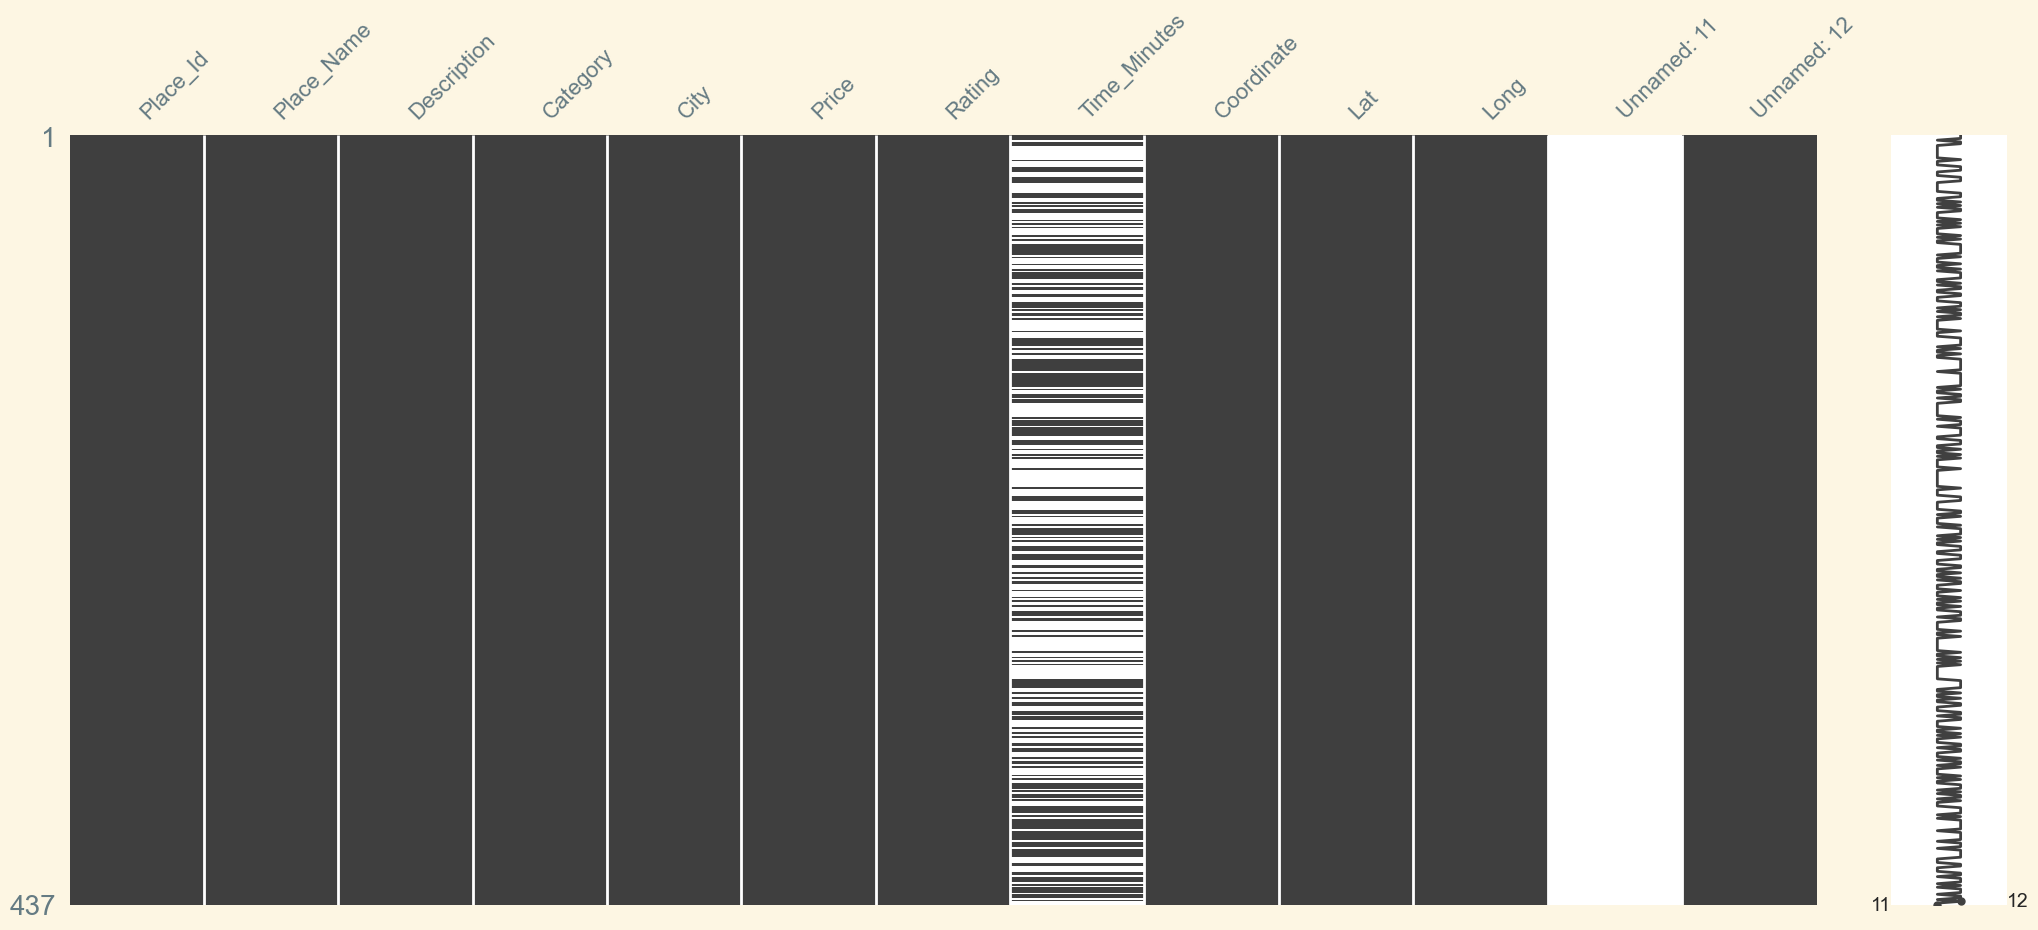

In [89]:
ms.matrix(tourism_information)

In [90]:
tourism_information.sample(10)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
430,431,Taman Hiburan Rakyat,Taman Hiburan Rakyat atau THR tentunya sudah t...,Taman Hiburan,Surabaya,5000,4.2,NaN,"{'lat': -7.252291, 'lng': 112.7520012}",-7.252291,112.752001,NaN,431
274,275,Curug Cipanas,Siapa bilang berendam air panas harus merogoh ...,Cagar Alam,Bandung,20000,3.9,180.0,"{'lat': -6.7991958, 'lng': 107.5922088}",-6.799196,107.592209,NaN,275
369,370,Benteng Pendem,Benteng Pendem Cilacap (bahasa Belanda: Kustba...,Budaya,Semarang,5000,4.2,60.0,"{'lat': -7.2706462, 'lng': 110.4103291}",-7.270646,110.410329,NaN,370
111,112,Bukit Bintang Yogyakarta,Bukit Bintang merupakan salah satu lokasi nong...,Taman Hiburan,Yogyakarta,25000,4.5,90.0,"{'lat': -7.845840699999997, 'lng': 110.4798457}",-7.845841,110.479846,NaN,112
414,415,Museum De Javasche Bank,Museum Bank Indonesia (Bahasa Indonesia: Museu...,Budaya,Surabaya,5000,4.6,60.0,"{'lat': -7.2353939, 'lng': 112.7367646}",-7.235394,112.736765,NaN,415
257,258,Museum Gedung Sate,Salah satu museum yang menjadi ikon kota ini a...,Budaya,Bandung,5000,4.6,NaN,"{'lat': -6.902637899999999, 'lng': 107.619169}",-6.902638,107.619169,NaN,258
360,361,Wisata Kampung Krisan Clapar,Wisata Kampung Krisan Gemah Ripah di Dusun Cla...,Taman Hiburan,Semarang,10000,4.1,NaN,"{'lat': -7.214158199999999, 'lng': 110.3769541}",-7.214158,110.376954,NaN,361
138,139,Puncak Gunung Api Purba - Nglanggeran,Gunung Nglanggeran adalah sebuah gunung di Dae...,Cagar Alam,Yogyakarta,10000,4.7,60.0,"{'lat': -7.841252999999998, 'lng': 110.543056}",-7.841253,110.543056,NaN,139
436,437,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Tempat Ibadah,Surabaya,10000,4.8,NaN,"{'lat': -7.2420758, 'lng': 112.7368158}",-7.242076,112.736816,NaN,437
410,411,Masjid Muhammad Cheng Hoo,Masjid Cheng Hoo Surabaya adalah Masjid bernua...,Tempat Ibadah,Surabaya,0,4.7,NaN,"{'lat': -7.252275399999999, 'lng': 112.7468796}",-7.252275,112.746880,NaN,411


In [91]:
print("summary data tourism information duplicated : ", tourism_information.duplicated().sum())
print("summary data tourism rating duplicated : ", tourism_rating.duplicated().sum())
print("summary data tourism user duplicated : ", tourism_user.duplicated().sum())

summary data tourism information duplicated :  0
summary data tourism rating duplicated :  79
summary data tourism user duplicated :  0


- terdapat tourism rating duplikat berjumlah 79
- tourism rating dan user tidak ada nilai data yang duplikat

Descriptive statictics

In [92]:
tourism_information.describe().style.background_gradient(cmap="RdPu")

,Place_Id,Price,Rating,Time_Minutes,Lat,Long,Unnamed: 11,Unnamed: 12
count,437.000000,437.000000,437.000000,205.000000,437.000000,437.000000,0.000000,437.000000
mean,219.000000,24652.173913,4.442792,82.609756,-7.095438,109.160142,nan,219.000000
std,126.295289,66446.374709,0.208587,52.872339,0.727241,1.962848,nan,126.295289
min,1.000000,0.000000,3.400000,10.000000,-8.197894,103.931398,nan,1.000000
25%,110.000000,0.000000,4.300000,45.000000,-7.749590,107.578369,nan,110.000000
50%,219.000000,5000.000000,4.500000,60.000000,-7.020524,110.237468,nan,219.000000
75%,328.000000,20000.000000,4.600000,120.000000,-6.829411,110.431869,nan,328.000000
max,437.000000,900000.000000,5.000000,360.000000,1.078880,112.821662,nan,437.000000


(-) Descriptive Analysis of tourism information

1. Dataset tourism information

- summary data entries : 437
- Q1 and Q3 : 110 and 328
- standard deviation :  126.29
- Rata-rata Price : 24.652 Rupiah
- mean Rating : 4.44 
- mean Time Minutes : 82 minutes
- mean Latitude : -7.095438
- mean Longtitude : 109.160142

In [93]:
tourism_rating.describe().style.background_gradient(cmap="RdPu")

,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


(-) Descriptive Analysis of tourism ratings

2. Dataset tourism rating

- summary data entries : 10000
- Q1 and Q3 : 77 and 226
- standard deviation : 86.13
- mean Place Id :  219
- mean Place Rating : 3.06 

In [94]:
tourism_user.describe().style.background_gradient(cmap="RdPu")

,User_Id,Age
count,300.000000,300.000000
mean,150.500000,28.700000
std,86.746758,6.393716
min,1.000000,18.000000
25%,75.750000,24.000000
50%,150.500000,29.000000
75%,225.250000,34.000000
max,300.000000,40.000000


(-) Descriptive Analysis of tourism users

3. Dataset tourism users

- summary data entries : 300
- standard deviation : 86.74
- Q1 and Q3 : 75 and 225
- mean User Id : 150
- mean Age : 28

Cleaning Data

Imputation Data

In [95]:
tourism_information[tourism_information.Time_Minutes.isna()]

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
6,7,Kebun Binatang Ragunan,Kebun Binatang Ragunan adalah sebuah kebun bin...,Cagar Alam,Jakarta,4000,4.5,NaN,"{'lat': -6.3124593, 'lng': 106.8201865}",-6.312459,106.820187,NaN,7
7,8,Ocean Ecopark,Ocean Ecopark Salah satu zona rekreasi Ancol y...,Taman Hiburan,Jakarta,180000,4.0,NaN,"{'lat': -6.125801699999999, 'lng': 106.8363249}",-6.125802,106.836325,NaN,8
8,9,Pelabuhan Marina,Pelabuhan Marina Ancol berada di kawasan Taman...,Bahari,Jakarta,175000,4.4,NaN,"{'lat': 1.07888, 'lng': 103.931398}",1.078880,103.931398,NaN,9
9,10,Pulau Tidung,Pulau Tidung adalah salah satu kelurahan di ke...,Bahari,Jakarta,150000,4.5,NaN,"{'lat': -5.803205300000001, 'lng': 106.5237907}",-5.803205,106.523791,NaN,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,427,Patung Buddha Empat Rupa,"Terletak di sudut Pantai Ria Kenjeran, Patung ...",Budaya,Surabaya,0,4.3,NaN,"{'lat': -7.2472841, 'lng': 112.8010814}",-7.247284,112.801081,NaN,427
430,431,Taman Hiburan Rakyat,Taman Hiburan Rakyat atau THR tentunya sudah t...,Taman Hiburan,Surabaya,5000,4.2,NaN,"{'lat': -7.252291, 'lng': 112.7520012}",-7.252291,112.752001,NaN,431
433,434,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.291346799999999, 'lng': 112.7398218}",-7.291347,112.739822,NaN,434
435,436,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.294330299999999, 'lng': 112.7617534}",-7.294330,112.761753,NaN,436


In [96]:
tourism_information.Time_Minutes.value_counts()

Time_Minutes
90.0     43
60.0     40
45.0     33
120.0    28
30.0     20
150.0    12
180.0     9
15.0      8
20.0      3
240.0     2
210.0     2
25.0      2
360.0     1
10.0      1
300.0     1
Name: count, dtype: int64

In [97]:
mean_time_minutes = tourism_information['Time_Minutes'].mean()
tourism_information['Time_Minutes'].fillna(mean_time_minutes, inplace=True)

print(tourism_information.isna().sum())

Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes      0
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64


In [98]:
tourism_information.drop(columns=["Unnamed: 11", "Unnamed: 12"], axis=1, inplace=True)

In [99]:
# Reset indeks tanpa menyimpan kolom 'index' yang baru
tourism_information.reset_index(drop=True, inplace=True)

# Periksa kembali nama kolom untuk memastikan kolom yang tidak diinginkan telah dihapus
print(tourism_information.columns)


Index(['Place_Id', 'Place_Name', 'Description', 'Category', 'City', 'Price',
       'Rating', 'Time_Minutes', 'Coordinate', 'Lat', 'Long'],
      dtype='object')


In [100]:
print("summary data tourism rating duplicated : ", tourism_rating.duplicated().sum())

summary data tourism rating duplicated :  79


In [101]:
if tourism_rating.duplicated().sum() > 0:
    tourism_rating.drop_duplicates(inplace=True)
    tourism_rating.reset_index(inplace=True, drop=True)

print("Jumlah Data yang duplicate", tourism_rating.duplicated().sum())

Jumlah Data yang duplicate 0


#  Exploratory Data Analysis

In [102]:
tourism_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  437 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 37.7+ KB


In [103]:
tourism_information.Category.unique()

array(['Budaya', 'Taman Hiburan', 'Cagar Alam', 'Bahari',
       'Pusat Perbelanjaan', 'Tempat Ibadah'], dtype=object)

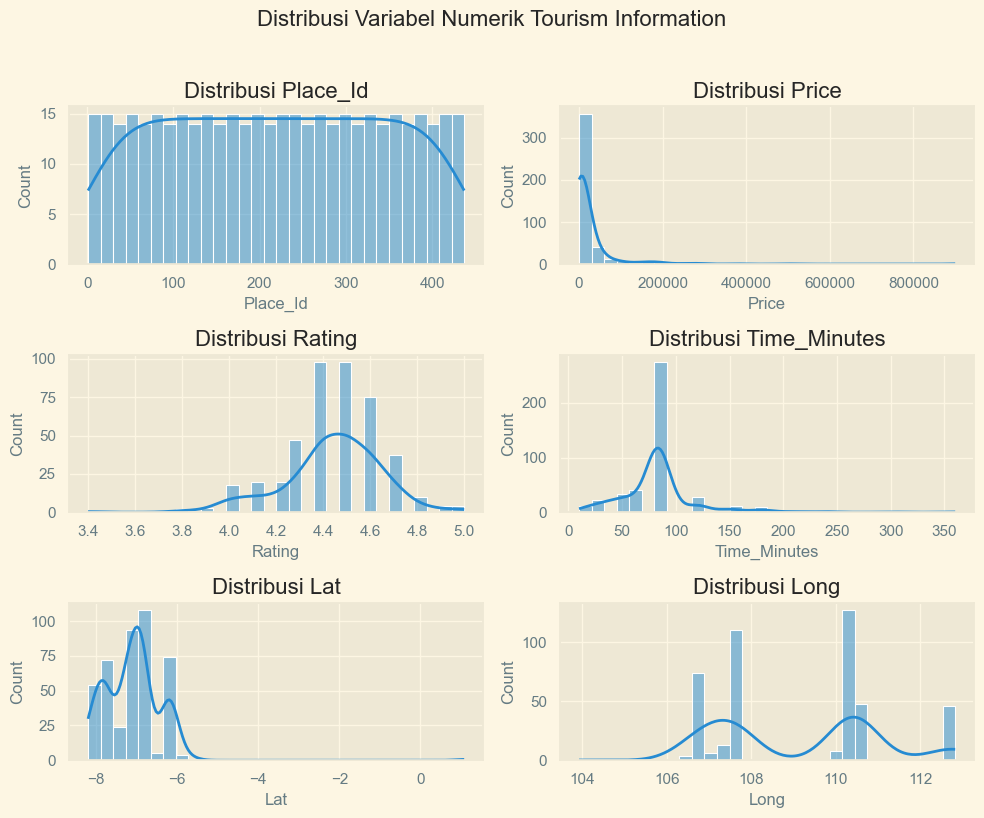

In [104]:
numeric_cols_information = ['Place_Id', 'Price', 'Rating', 'Time_Minutes', 'Lat', 'Long']

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))
fig.suptitle('Distribusi Variabel Numerik Tourism Information', y=1.02, fontsize=16)

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through numeric columns and create histograms
for i, col in enumerate(numeric_cols_information):
    sns.histplot(tourism_information[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribusi {col}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()